<a href="https://colab.research.google.com/github/Reemaalt/Detection-of-Hallucination-in-Arabic/blob/main/MLQA_ThresholdExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import json
import numpy as np

# Load JSON file
with open("/content/labeled_file-2.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# List to store cluster counts for non-hallucinated questions
cluster_counts = []
cluster_counts_hall=[]
# Iterate through questions
for question_id, question_data in data.items():
    if question_data.get("question_label") == "non-hallucinated":
        num_clusters = len(question_data.get("clusters", []))
        cluster_counts.append(num_clusters)

# Calculate threshold (mean )
if cluster_counts:
    threshold = np.floor(np.mean(cluster_counts))
    print(f"Threshold for clusters: {threshold}")
    print(cluster_counts)
else:
    print("No non-hallucinated questions found.")

for question_id, question_data in data.items():
    if question_data.get("question_label") == "hallucinated":
        num_clusters_hall = len(question_data.get("clusters", []))
        cluster_counts_hall.append(num_clusters_hall)
print(cluster_counts_hall)



Threshold for clusters: 5.0
[5, 5, 4, 3, 8, 5, 7, 3, 4, 6, 8, 8, 5, 5, 5, 3]
[9, 10, 8, 8, 10, 7, 4, 9, 6, 7, 7, 7, 8, 10, 7, 9, 7, 7, 6, 8, 4, 8, 9, 5, 6, 9, 8, 10, 8, 6, 9, 9, 9, 9, 9, 9, 7, 10, 6, 9, 8, 7, 9, 9, 10, 6, 7, 7, 6, 9, 6, 6, 3, 10, 9, 7, 6, 10, 10, 8, 10, 8, 8, 9, 8, 9, 7, 10, 10, 4, 8, 7, 4, 6, 4, 6, 9, 5, 6, 6, 10, 7, 7, 9]


In [5]:

# Load the dataset mlqa labeled sample
input_full_file = "/content/labeled_file-2.json"
with open(input_full_file, "r", encoding="utf-8") as f:
    data = json.load(f)
# Create a new labeled dataset based on threshold
new_data = {}

for question_id, question_data in data.items():
    num_clusters = len(question_data.get("clusters", []))

    # Assign label based on the threshold
    threshold_label = "hallucinated" if num_clusters > threshold else "non-hallucinated"

    # Copy original data and add the new label
    new_data[question_id] = {
        **question_data,  # Copy original question data
        "threshold_label": threshold_label  # Add new label
    }

# Save the new JSON file the sample with addition of theshold label
new_file_name = "labeled_full_data.json"
with open(new_file_name, "w", encoding="utf-8") as f:
    json.dump(new_data, f, ensure_ascii=False, indent=4)

print(f"New labeled file saved as '{new_file_name}'.")

New labeled file saved as 'labeled_full_data.json'.


AUROC Score: 0.8296


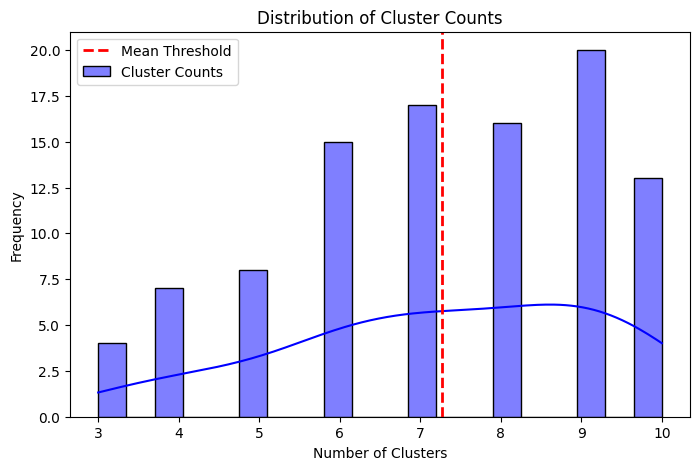

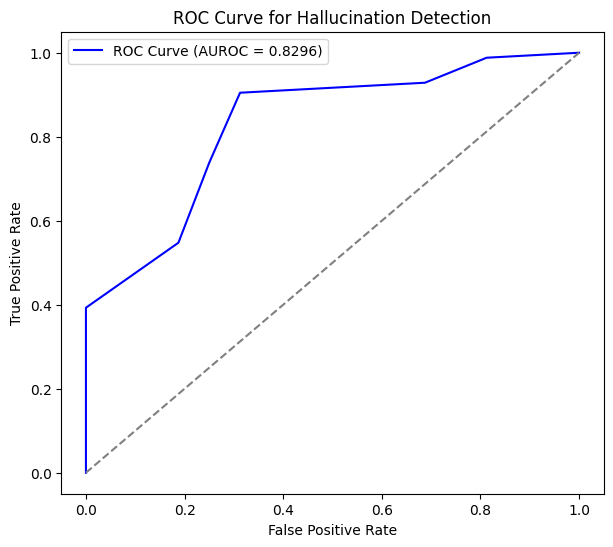

In [8]:
#evaluation on sample
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Load the dataset with the new threshold-based labels
with open("labeled_full_data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Extract ground truth labels and predicted labels
true_labels = []
pred_scores = []  # This will store the number of clusters (used as a score)
predicted_labels = []  # This will store the predicted labels based on the threshold

for question_id, question_data in data.items():
    # Convert string labels to numerical (1 = hallucinated, 0 = non-hallucinated)
    true_label = 1 if question_data.get("question_label") == "hallucinated" else 0
    predicted_label = 1 if question_data.get("threshold_label") == "hallucinated" else 0

    # Store ground truth and predicted scores
    true_labels.append(true_label)
    pred_scores.append(len(question_data.get("clusters", [])))  # Use cluster count as a prediction score
    predicted_labels.append(predicted_label)
# Compute AUROC score
auroc = roc_auc_score(true_labels, pred_scores)
print(f"AUROC Score: {auroc:.4f}")

# Plot Histogram of Cluster Counts
plt.figure(figsize=(8, 5))
sns.histplot(pred_scores, bins=20, kde=True, color='blue', label="Cluster Counts")
plt.axvline(np.mean(pred_scores), color='red', linestyle='dashed', linewidth=2, label="Mean Threshold")
plt.xlabel("Number of Clusters")
plt.ylabel("Frequency")
plt.title("Distribution of Cluster Counts")
plt.legend()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(true_labels, pred_scores)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUROC = {auroc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Hallucination Detection")
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute classification metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8700
Precision: 0.9383
Recall: 0.9048
F1 Score: 0.9212


In [ ]:

# Load the dataset mlqa full answers generated and evaluate method after doing rouge l labeling